In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

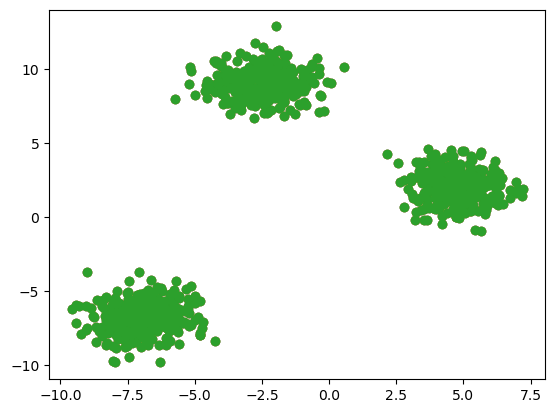

In [5]:
plt.scatter(X[:, 0], X[:, 1]);
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1. KMeans Clustering

In [7]:
from sklearn.cluster import KMeans 

In [8]:
## Manual Process
## Elbow Method to select the K value

wcss=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[44450.72387542038,
 12741.823357662128,
 1329.7219815435355,
 1187.6267667520187,
 1024.7416909117123,
 852.7839138184388,
 829.7217166618016,
 678.3297397957132,
 595.5951833664114,
 556.8273623952635]

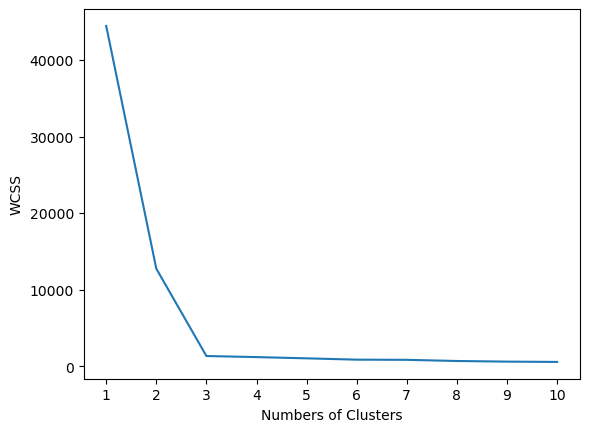

In [10]:
# Plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [12]:
y_labels = kmeans.fit_predict(X_train)

In [14]:
y_test_labels = kmeans.predict(X_test)

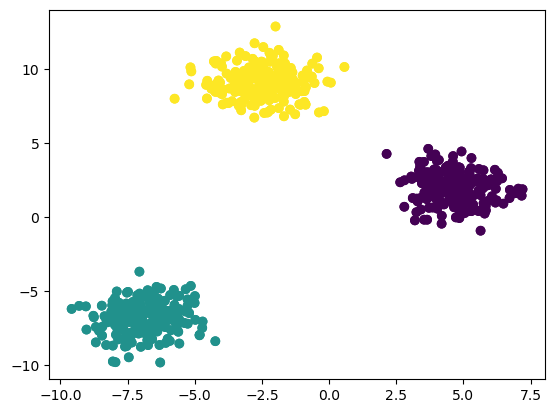

In [16]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_labels)
plt.show()

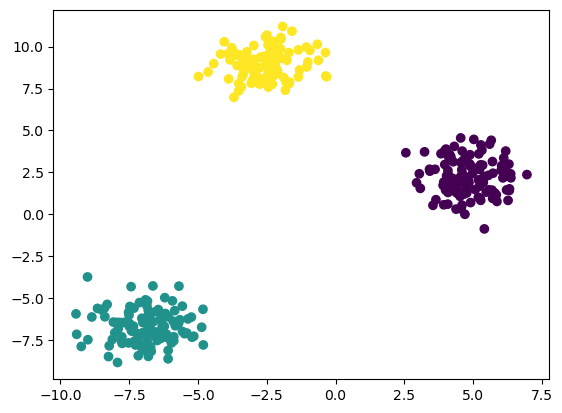

In [17]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test_labels)
plt.show()

In [18]:
# Knee Locator - Given a set of x and y values, kneed will return the knee point of the function.
!pip install kneed

In [19]:
from kneed import KneeLocator

kl=KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [20]:
kl.elbow

3

In [22]:
# Performance Metrics
## Silhoutte score

from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
silhouette_coefficients

[0.7024009416893274,
 0.8417121581954967,
 0.6589096939323218,
 0.4912392284523987,
 0.5062789719615297,
 0.4862894131206184,
 0.3337129336962155,
 0.3192201246661207,
 0.3323250596325171]

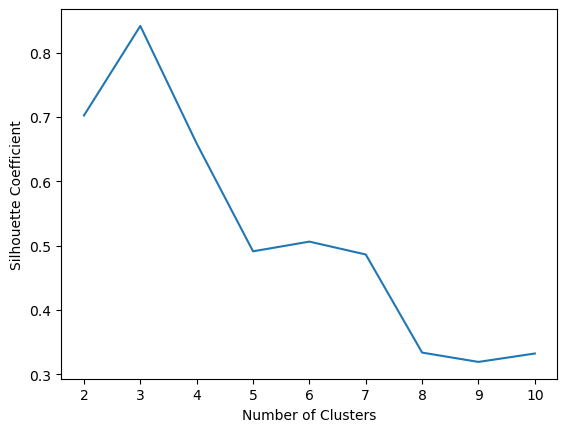

In [24]:
# plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 2. Hierarichal Clustering 

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns= iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Scale data -> PCA for dimentionality reduction -> Hierachichal Clustering on 2d data

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_scaled = scaler.fit_transform(iris_data)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [27]:
X_scaled.shape

(150, 4)

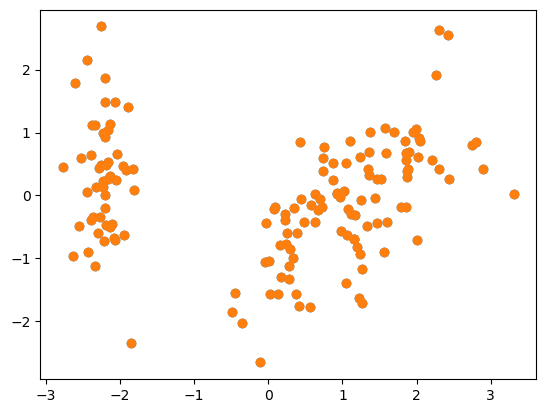

In [29]:
# Apply the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled=pca.fit_transform(X_scaled)

plt.scatter(pca_scaled[:,0], pca_scaled[:,1])
plt.show()

### 2.1 Agglomerative Clustering

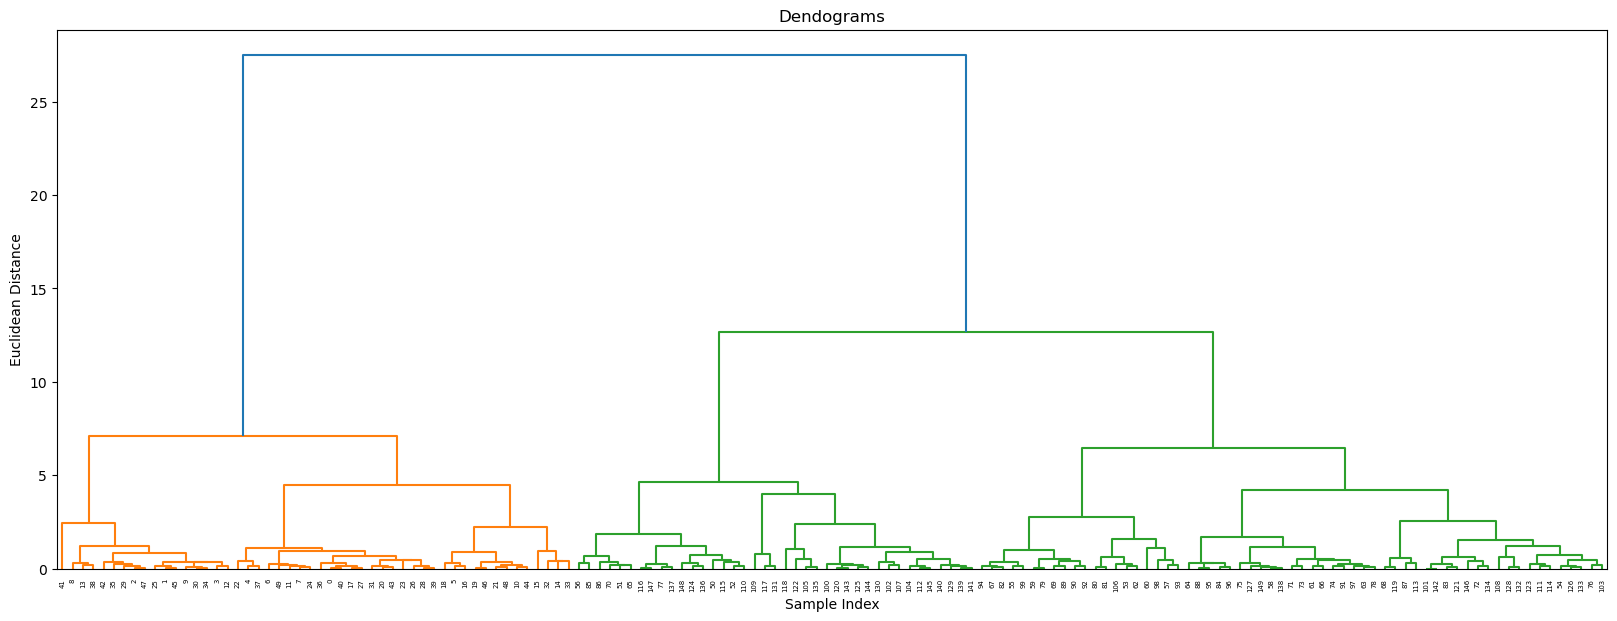

In [32]:
# construct dendogram
import scipy.cluster.hierarchy as sc
# plot the dendogram
plt.figure(figsize=(20, 7))
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title('Dendograms')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [35]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

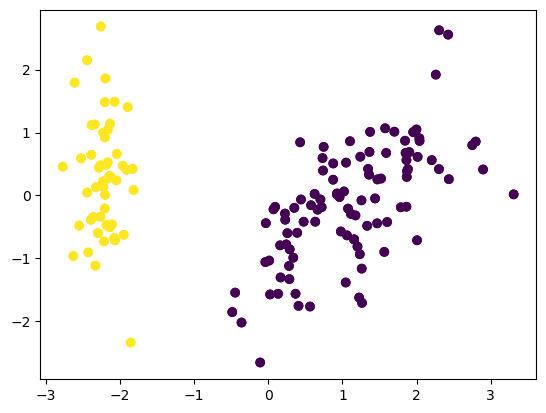

In [37]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:,1], c=cluster.labels_)
plt.show()

In [38]:
silhouette_coefficients = []
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

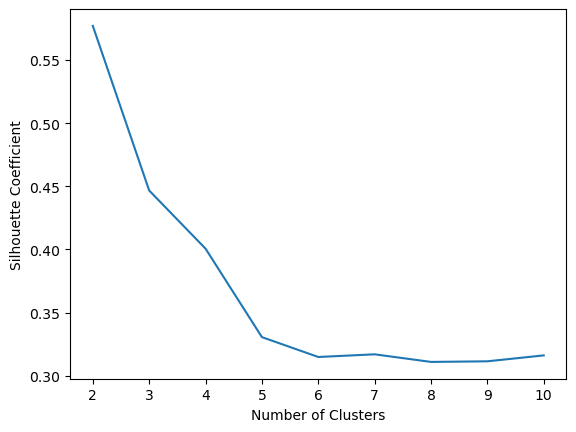

In [39]:
# plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## DBScan Clustering

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X, y = make_moons(n_samples=250, noise=0.05)
X

array([[ 1.81033854e+00,  1.47047155e-02],
       [-1.02939822e+00,  7.62351473e-02],
       [-5.75839485e-01,  8.00374185e-01],
       [ 3.91287576e-01,  9.03258105e-01],
       [-1.02493951e+00,  3.25985508e-01],
       [ 4.34223074e-01, -3.37955978e-01],
       [ 8.69567809e-01,  5.53944067e-01],
       [-9.55689050e-01,  4.11813164e-01],
       [ 1.50904433e-01,  1.05526857e+00],
       [ 1.91902510e+00,  1.08890472e-01],
       [ 1.01236840e+00,  4.35232183e-01],
       [ 4.96127261e-01, -2.27629371e-01],
       [-2.02076232e-02,  5.53490130e-01],
       [-7.35677835e-01,  7.65012610e-01],
       [-4.13840337e-01,  9.26527638e-01],
       [ 9.11449820e-01,  1.40705365e-01],
       [-8.57935070e-01,  4.54795039e-01],
       [-5.62290001e-01,  7.65204142e-01],
       [ 1.51262782e-01, -1.39926273e-03],
       [ 2.05509101e+00,  2.76279633e-01],
       [-2.70411253e-01,  9.12881305e-01],
       [ 8.36981216e-01, -4.51918981e-01],
       [ 4.60306486e-02,  9.44005001e-01],
       [ 5.

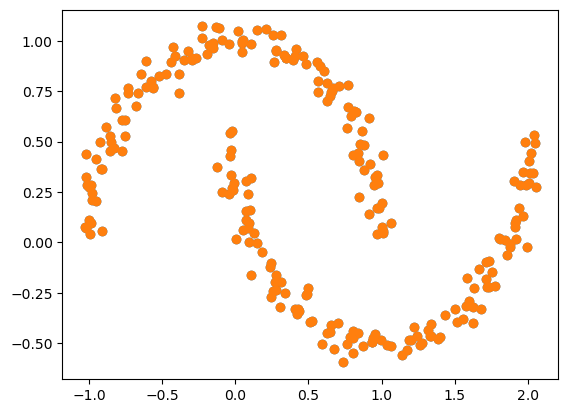

In [43]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [44]:
## Feature scaling(Standard Scaling)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.50026908, -0.48435968],
       [-1.74558042, -0.36047157],
       [-1.22715793,  1.09754214],
       [-0.12172135,  1.30469319],
       [-1.74048407,  0.1423869 ],
       [-0.07264562, -1.19442238],
       [ 0.42495807,  0.60136879],
       [-1.66133005,  0.31519611],
       [-0.39648186,  1.61075782],
       [ 1.62449898, -0.29472189],
       [ 0.58818067,  0.36234901],
       [-0.00188847, -0.97228589],
       [-0.59206477,  0.60045481],
       [-1.40985488,  1.02634357],
       [-1.04199117,  1.3515451 ],
       [ 0.47282966, -0.23066437],
       [-1.5495962 ,  0.40173773],
       [-1.21167073,  1.02672921],
       [-0.39607226, -0.51678414],
       [ 1.78002378,  0.04230688],
       [-0.87805019,  1.32406897],
       [ 0.38771125, -1.42388056],
       [-0.51635372,  1.3867348 ],
       [-0.50562181,  1.50546746],
       [ 1.16248142, -1.31287346],
       [ 0.06747353,  1.28693462],
       [ 0.96257616, -1.4512435 ],
       [ 0.31158933,  1.05493376],
       [-1.26739352,

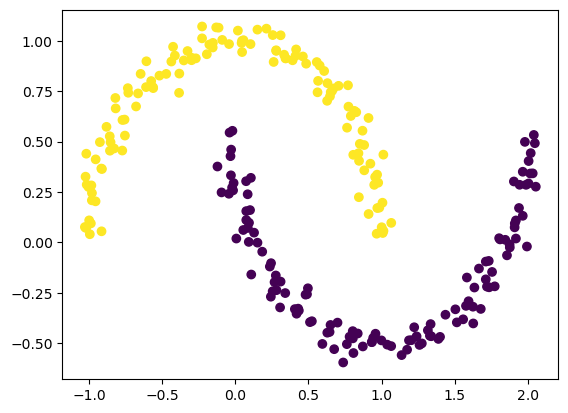

In [45]:
# DBScan Algorithm
dbscan = DBSCAN(eps=0.5)
dbscan.fit(X_scaled)
dbscan.labels_

plt.scatter(X[:,0], X[:,1],c=dbscan.labels_)
plt.show()


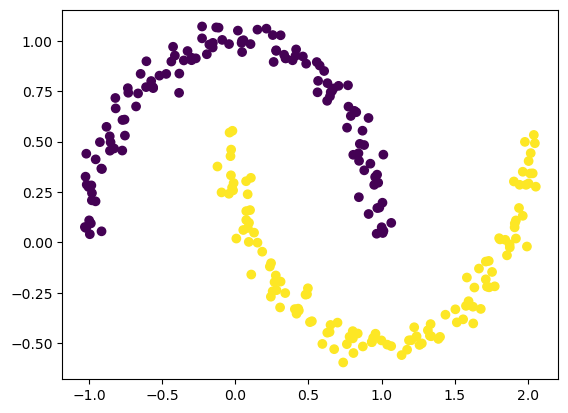

In [48]:
plt.scatter(X[:, 0], X[:,1], c=y)
plt.show()